In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,  )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
classes[5]

'dog'

In [14]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

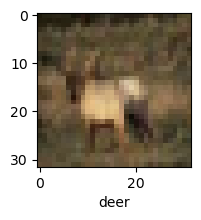

In [17]:
plot_sample(x_train, y_train, 3)

In [19]:
x_train = x_train /255
x_test = x_test / 255

In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5


1563/1563 [==============================] - 52s 33ms/step - loss: 1.8135 - accuracy: 0.3538
Epoch 2/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.6212 - accuracy: 0.4285
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5417 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 46s 30ms/step - loss: 1.4820 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.4310 - accuracy: 0.4962


In [22]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4593 - accuracy: 0.4800


[1.4593427181243896, 0.47999998927116394]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classifcation Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classifcation Report : 
               precision    recall  f1-score   support

           0       0.55      0.53      0.54      1000
           1       0.64      0.55      0.59      1000
           2       0.37      0.35      0.36      1000
           3       0.37      0.30      0.33      1000
           4       0.37      0.48      0.42      1000
           5       0.50      0.24      0.32      1000
           6       0.42      0.71      0.53      1000
           7       0.67      0.43      0.52      1000
           8       0.49      0.73      0.59      1000
           9       0.59      0.48      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [25]:
cnn = models.Sequential([
        layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
    
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
cnn.fit(x_train,y_train, epochs =10)

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4679 - accuracy: 0.4732
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1100 - accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9770 - accuracy: 0.6610
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8944 - accuracy: 0.6904
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8269 - accuracy: 0.7137
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7750 - accuracy: 0.7286
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7268 - accuracy: 0.7476
Epoch 8/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6808 - accuracy: 0.7641
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6418 - accuracy: 0.7769
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [27]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9247 - accuracy: 0.6973


[0.9246535301208496, 0.6973000168800354]

In [29]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

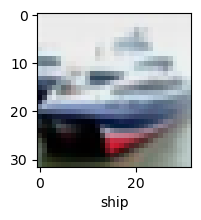

In [30]:
plot_sample(x_test, y_test, 1)

In [31]:
y_pred = cnn.predict(x_test)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[1.2231943e-04, 1.4499508e-06, 6.5519649e-05, ..., 1.8627273e-06,
        6.8449820e-03, 5.4501281e-05],
       [8.9027616e-04, 5.1596582e-02, 5.3933900e-07, ..., 1.1375201e-08,
        9.4709873e-01, 4.1366185e-04],
       [9.4493181e-02, 4.4501388e-01, 1.4381639e-02, ..., 1.0387047e-02,
        2.8787115e-01, 1.2904619e-01],
       ...,
       [2.4786372e-05, 2.6201242e-06, 4.2564787e-02, ..., 3.7935145e-02,
        1.3764954e-05, 6.2186335e-04],
       [8.3787618e-03, 5.2821571e-01, 2.1632574e-03, ..., 2.7153795e-03,
        5.3037707e-05, 3.0719903e-03],
       [8.3822606e-08, 1.1951170e-07, 7.4370975e-05, ..., 9.9947387e-01,
        5.0216851e-08, 1.4740108e-08]], dtype=float32)

In [33]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

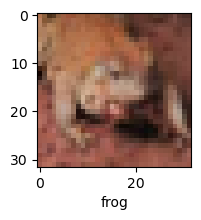

In [44]:
plot_sample(x_test,y_test, 5)

In [43]:
classes[y_classes[5]]

'frog'

In [46]:
print("Classification Report : \n", classification_report(y_test, y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      1000
           1       0.84      0.79      0.82      1000
           2       0.54      0.67      0.59      1000
           3       0.47      0.62      0.53      1000
           4       0.70      0.59      0.64      1000
           5       0.73      0.46      0.56      1000
           6       0.76      0.78      0.77      1000
           7       0.78      0.72      0.75      1000
           8       0.77      0.83      0.80      1000
           9       0.78      0.76      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

